In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
new_rest = pd.read_csv('new_restaurants.csv')
new_rest

,address,name,online_order,book_table,rest_rating,votes,location,rest_type,cuisines,cost_two_person,reviews_list,menu_item,type
0,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,0.0,0,Banashankari,Quick Bites,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery
1,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,0.0,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,[],[],Delivery
2,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,0.0,0,Banashankari,Quick Bites,"South Indian, Chinese",100,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery
3,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,0.0,0,Banashankari,Delivery,"Bakery, Desserts",500,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery
4,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,0.0,0,Banashankari,"Takeaway, Delivery",South Indian,400,[],[],Delivery
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,0.0,0,Brookefield,Quick Bites,North Indian,400,[],[],Dine-out
9938,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,0.0,0,Whitefield,Bar,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife
9939,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,0.0,0,Whitefield,Bar,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars
9940,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,0.0,0,Whitefield,Bar,Finger Food,600,[],[],Pubs and bars


# Data Cleaning

In [3]:
# checking for nulls
# columns rate, phone, location, rest_type, dish_liked , cuisines, approx_cost(for two people) have null values.
new_rest.isnull().sum()

address             0
name                0
online_order        0
book_table          0
rest_rating         0
votes               0
location            0
rest_type          57
cuisines            0
cost_two_person     0
reviews_list        0
menu_item           0
type                0
dtype: int64

In [4]:
new_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9942 entries, 0 to 9941
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          9942 non-null   object 
 1   name             9942 non-null   object 
 2   online_order     9942 non-null   object 
 3   book_table       9942 non-null   object 
 4   rest_rating      9942 non-null   float64
 5   votes            9942 non-null   int64  
 6   location         9942 non-null   object 
 7   rest_type        9885 non-null   object 
 8   cuisines         9942 non-null   object 
 9   cost_two_person  9942 non-null   int64  
 10  reviews_list     9942 non-null   object 
 11  menu_item        9942 non-null   object 
 12  type             9942 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1009.9+ KB


In [5]:
# dropping rest_type null values
new_rest.dropna(subset=['rest_type'], inplace=True)

In [6]:
new_rest.isnull().sum()

address            0
name               0
online_order       0
book_table         0
rest_rating        0
votes              0
location           0
rest_type          0
cuisines           0
cost_two_person    0
reviews_list       0
menu_item          0
type               0
dtype: int64

In [7]:
columns_to_drop = ['address', 'name', 'reviews_list', 'menu_item', 'votes', 'rest_rating']

# dropping the columns and assigning the result to df_2
new_rest_data = new_rest.drop(columns=columns_to_drop)

In [8]:
new_rest_data

,online_order,book_table,location,rest_type,cuisines,cost_two_person,type
0,No,No,Banashankari,Quick Bites,North Indian,150,Delivery
1,No,No,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,Delivery
2,No,No,Banashankari,Quick Bites,"South Indian, Chinese",100,Delivery
3,No,No,Banashankari,Delivery,"Bakery, Desserts",500,Delivery
4,No,No,Banashankari,"Takeaway, Delivery",South Indian,400,Delivery
...,...,...,...,...,...,...,...
9937,No,No,Brookefield,Quick Bites,North Indian,400,Dine-out
9938,No,No,Whitefield,Bar,Finger Food,900,Drinks & nightlife
9939,No,No,Whitefield,Bar,Finger Food,900,Pubs and bars
9940,No,No,Whitefield,Bar,Finger Food,600,Pubs and bars


In [9]:
new_rest_data.describe()

,cost_two_person
count,9885.000000
mean,356.218412
std,218.781073
min,50.000000
25%,200.000000
50%,300.000000
75%,400.000000
max,2100.000000


In [10]:
# Feature ENgineering

In [11]:
def generalize_top_n_values(df, column_name, top_values_count, new_value='Other'):
    """
    Generalize a DataFrame column by keeping the top N most frequent values and replacing the rest with a new value.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the column to be generalized.
        column_name (str): The name of the column to be generalized.
        top_values_count (int): The number of top values to keep.
        new_value (str, optional): The value to replace less frequent values with (default is 'Other').

    Returns:
        pd.DataFrame: The DataFrame with the column generalized.
    """
    # Count the occurrences of each unique value in the specified column
    value_counts = df[column_name].value_counts()

    # Extract the top N values based on their frequency
    top_values = value_counts.index[:top_values_count]

    # Replace values in the column with 'new_value' for those not in the top N
    df[column_name] = df[column_name].apply(lambda x: x if x in top_values else new_value)

    return df


In [12]:
new_rest_data = generalize_top_n_values(new_rest_data, 'location', 10)

In [13]:
new_rest_data['location'].unique()

array(['Other', 'JP Nagar', 'Jayanagar', 'Bannerghatta Road', 'BTM',
       'Electronic City', 'HSR', 'Marathahalli', 'Bellandur',
       'Whitefield', 'Koramangala 1st Block'], dtype=object)

In [14]:
# cuisines column generalisation
new_rest_data = generalize_top_n_values(new_rest_data, 'cuisines', 10)

In [15]:
new_rest_data['cuisines'].unique()

array(['North Indian', 'Other', 'Bakery, Desserts', 'South Indian',
       'Bakery', 'Biryani', 'Desserts', 'Fast Food',
       'North Indian, Chinese', 'South Indian, North Indian, Chinese',
       'Chinese'], dtype=object)

In [16]:
# Creating number of cuisines column as an adittional feature

In [17]:
def count_list(input_list):
    """
    Count the number of elements in a list.

    Parameters:
    input_list (list): The input list to count elements from.

    Returns:
    int: The count of elements in the list.
    """
    return len(input_list)

In [18]:
# adding a new column 'cuisines_count' to the DataFrame 'df_model'
# The 'cuisines' column contains strings with cuisines separated by commas, and we want to count the number of cuisines.
# splitting the strings into lists and apply the 'count_list' function to each list.
new_rest_data['cuisines_count'] = new_rest_data['cuisines'].str.split(',').apply(count_list)

In [19]:
new_rest_data

,online_order,book_table,location,rest_type,cuisines,cost_two_person,type,cuisines_count
0,No,No,Other,Quick Bites,North Indian,150,Delivery,1
1,No,No,Other,"Takeaway, Delivery",Other,500,Delivery,1
2,No,No,Other,Quick Bites,Other,100,Delivery,1
3,No,No,Other,Delivery,"Bakery, Desserts",500,Delivery,2
4,No,No,Other,"Takeaway, Delivery",South Indian,400,Delivery,1
...,...,...,...,...,...,...,...,...
9937,No,No,Other,Quick Bites,North Indian,400,Dine-out,1
9938,No,No,Whitefield,Bar,Other,900,Drinks & nightlife,1
9939,No,No,Whitefield,Bar,Other,900,Pubs and bars,1
9940,No,No,Whitefield,Bar,Other,600,Pubs and bars,1


In [20]:
#Creating number of service types column as an aditional feature¶

In [21]:
# function to split the 'rest_type' column based on commas
def split_on_commas(rest_type):
    if pd.isna(rest_type):
        return []
    return rest_type.split(', ')

# function to count the number of items in a list
def count_list(items_list):
    return len(items_list)

# split the 'rest_type' column using commas and store the resulting list in a new column
new_rest_data['count_service_list'] = new_rest_data['rest_type'].apply(split_on_commas)

#cCount the number of items in the 'Count_service_list' and store the count in a new column
new_rest_data['service_type_count'] = new_rest_data['count_service_list'].apply(count_list)

In [22]:
new_rest_data

,online_order,book_table,location,rest_type,cuisines,cost_two_person,type,cuisines_count,count_service_list,service_type_count
0,No,No,Other,Quick Bites,North Indian,150,Delivery,1,[Quick Bites],1
1,No,No,Other,"Takeaway, Delivery",Other,500,Delivery,1,"[Takeaway, Delivery]",2
2,No,No,Other,Quick Bites,Other,100,Delivery,1,[Quick Bites],1
3,No,No,Other,Delivery,"Bakery, Desserts",500,Delivery,2,[Delivery],1
4,No,No,Other,"Takeaway, Delivery",South Indian,400,Delivery,1,"[Takeaway, Delivery]",2
...,...,...,...,...,...,...,...,...,...,...
9937,No,No,Other,Quick Bites,North Indian,400,Dine-out,1,[Quick Bites],1
9938,No,No,Whitefield,Bar,Other,900,Drinks & nightlife,1,[Bar],1
9939,No,No,Whitefield,Bar,Other,900,Pubs and bars,1,[Bar],1
9940,No,No,Whitefield,Bar,Other,600,Pubs and bars,1,[Bar],1


In [23]:
# Encoding Categorical Features

In [24]:
# List of columns to apply one-hot encoding
columns_to_encode = ['type', 'location', 'cuisines']

# Perform one-hot encoding on the specified columns

df_encoded = pd.get_dummies(new_rest_data, columns=columns_to_encode, drop_first=True)

In [25]:
df_encoded

,online_order,book_table,rest_type,cost_two_person,cuisines_count,count_service_list,service_type_count,type_Cafes,type_Delivery,type_Desserts,...,"cuisines_Bakery, Desserts",cuisines_Biryani,cuisines_Chinese,cuisines_Desserts,cuisines_Fast Food,cuisines_North Indian,"cuisines_North Indian, Chinese",cuisines_Other,cuisines_South Indian,"cuisines_South Indian, North Indian, Chinese"
0,No,No,Quick Bites,150,1,[Quick Bites],1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,No,No,"Takeaway, Delivery",500,1,"[Takeaway, Delivery]",2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,No,No,Quick Bites,100,1,[Quick Bites],1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,No,No,Delivery,500,2,[Delivery],1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,No,No,"Takeaway, Delivery",400,1,"[Takeaway, Delivery]",2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937,No,No,Quick Bites,400,1,[Quick Bites],1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9938,No,No,Bar,900,1,[Bar],1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9939,No,No,Bar,900,1,[Bar],1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9940,No,No,Bar,600,1,[Bar],1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
LE = LabelEncoder()

# List of categorical features to encode from your dataset
features_to_encode = ['online_order', 'book_table']

# Loop through each feature for label encoding
for feature in features_to_encode:
    # Apply LabelEncoder to the current feature in the DataFrame
    df_encoded[feature] = LE.fit_transform(df_encoded[feature])
    
    # Print a message indicating which feature is being encoded
    print(f'Encoding feature: {feature}')
    
    # Print the mapping of encoded values to their original labels
    for i in range(len(LE.classes_)):
        print(f'{i} -----> {LE.classes_[i]}')
    
    # Print a separator to distinguish between different features
    print('*' * 50)

Encoding feature: online_order
0 -----> No
1 -----> Yes
**************************************************
Encoding feature: book_table
0 -----> No
1 -----> Yes
**************************************************


In [27]:
df_encoded

,online_order,book_table,rest_type,cost_two_person,cuisines_count,count_service_list,service_type_count,type_Cafes,type_Delivery,type_Desserts,...,"cuisines_Bakery, Desserts",cuisines_Biryani,cuisines_Chinese,cuisines_Desserts,cuisines_Fast Food,cuisines_North Indian,"cuisines_North Indian, Chinese",cuisines_Other,cuisines_South Indian,"cuisines_South Indian, North Indian, Chinese"
0,0,0,Quick Bites,150,1,[Quick Bites],1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,"Takeaway, Delivery",500,1,"[Takeaway, Delivery]",2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,Quick Bites,100,1,[Quick Bites],1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,Delivery,500,2,[Delivery],1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,"Takeaway, Delivery",400,1,"[Takeaway, Delivery]",2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937,0,0,Quick Bites,400,1,[Quick Bites],1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9938,0,0,Bar,900,1,[Bar],1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9939,0,0,Bar,900,1,[Bar],1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9940,0,0,Bar,600,1,[Bar],1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
# feature scaling
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9885 entries, 0 to 9941
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   online_order                                  9885 non-null   int64 
 1   book_table                                    9885 non-null   int64 
 2   rest_type                                     9885 non-null   object
 3   cost_two_person                               9885 non-null   int64 
 4   cuisines_count                                9885 non-null   int64 
 5   count_service_list                            9885 non-null   object
 6   service_type_count                            9885 non-null   int64 
 7   type_Cafes                                    9885 non-null   uint8 
 8   type_Delivery                                 9885 non-null   uint8 
 9   type_Desserts                                 9885 non-null   uint8 
 10  

In [29]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
SS = StandardScaler()

# Identify numerical columns (this is an example, you'll need to specify your actual numerical columns)
numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Use the StandardScaler to scale the numerical features in the DataFrame 'df_encoded'
df_encoded[numerical_columns] = SS.fit_transform(df_encoded[numerical_columns])

# Display the first few rows of the scaled data to examine the transformation
df_encoded.head()

,online_order,book_table,rest_type,cost_two_person,cuisines_count,count_service_list,service_type_count,type_Cafes,type_Delivery,type_Desserts,...,"cuisines_Bakery, Desserts",cuisines_Biryani,cuisines_Chinese,cuisines_Desserts,cuisines_Fast Food,cuisines_North Indian,"cuisines_North Indian, Chinese",cuisines_Other,cuisines_South Indian,"cuisines_South Indian, North Indian, Chinese"
0,-0.693309,-0.122013,Quick Bites,-0.942627,-0.290097,[Quick Bites],-0.379950,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.693309,-0.122013,"Takeaway, Delivery",0.657227,-0.290097,"[Takeaway, Delivery]",2.631924,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.693309,-0.122013,Quick Bites,-1.171177,-0.290097,[Quick Bites],-0.379950,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.693309,-0.122013,Delivery,0.657227,2.537919,[Delivery],-0.379950,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.693309,-0.122013,"Takeaway, Delivery",0.200126,-0.290097,"[Takeaway, Delivery]",2.631924,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
# columns to be dropped
columns_to_drop = ['rest_type', 'count_service_list']

# dropping the columns 
final_df = df_encoded.drop(columns=columns_to_drop)

In [31]:
final_df.head()

,online_order,book_table,cost_two_person,cuisines_count,service_type_count,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,...,"cuisines_Bakery, Desserts",cuisines_Biryani,cuisines_Chinese,cuisines_Desserts,cuisines_Fast Food,cuisines_North Indian,"cuisines_North Indian, Chinese",cuisines_Other,cuisines_South Indian,"cuisines_South Indian, North Indian, Chinese"
0,-0.693309,-0.122013,-0.942627,-0.290097,-0.379950,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.693309,-0.122013,0.657227,-0.290097,2.631924,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.693309,-0.122013,-1.171177,-0.290097,-0.379950,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.693309,-0.122013,0.657227,2.537919,-0.379950,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.693309,-0.122013,0.200126,-0.290097,2.631924,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
#final_df.reset_index(drop=True, inplace=True)

In [33]:
final_df

,online_order,book_table,cost_two_person,cuisines_count,service_type_count,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,...,"cuisines_Bakery, Desserts",cuisines_Biryani,cuisines_Chinese,cuisines_Desserts,cuisines_Fast Food,cuisines_North Indian,"cuisines_North Indian, Chinese",cuisines_Other,cuisines_South Indian,"cuisines_South Indian, North Indian, Chinese"
0,-0.693309,-0.122013,-0.942627,-0.290097,-0.379950,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.693309,-0.122013,0.657227,-0.290097,2.631924,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.693309,-0.122013,-1.171177,-0.290097,-0.379950,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.693309,-0.122013,0.657227,2.537919,-0.379950,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.693309,-0.122013,0.200126,-0.290097,2.631924,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937,-0.693309,-0.122013,0.200126,-0.290097,-0.379950,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9938,-0.693309,-0.122013,2.485631,-0.290097,-0.379950,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9939,-0.693309,-0.122013,2.485631,-0.290097,-0.379950,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9940,-0.693309,-0.122013,1.114328,-0.290097,-0.379950,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9885 entries, 0 to 9941
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   online_order                                  9885 non-null   float64
 1   book_table                                    9885 non-null   float64
 2   cost_two_person                               9885 non-null   float64
 3   cuisines_count                                9885 non-null   float64
 4   service_type_count                            9885 non-null   float64
 5   type_Cafes                                    9885 non-null   uint8  
 6   type_Delivery                                 9885 non-null   uint8  
 7   type_Desserts                                 9885 non-null   uint8  
 8   type_Dine-out                                 9885 non-null   uint8  
 9   type_Drinks & nightlife                       9885 non-null   u

# Prediction

In [35]:
# importing model
import joblib
model = joblib.load('random_forest_model.joblib')

In [36]:

trained_feature_names = model.feature_names_in_

# Check if all columns in 'final_df' are present in 'trained_feature_names'
missing_features = set(trained_feature_names) - set(final_df.columns)
additional_features = set(final_df.columns) - set(trained_feature_names)

if missing_features:
    print(f"Missing features in 'final_df' that were present during training: {missing_features}")
    
if additional_features:
    print(f"Additional features in 'final_df' that were not present during training: {additional_features}")

Missing features in 'final_df' that were present during training: {'location_Indiranagar', 'location_Koramangala 5th Block', 'cuisines_Ice Cream, Desserts', 'location_Koramangala 6th Block', 'cuisines_Cafe'}
Additional features in 'final_df' that were not present during training: {'location_Electronic City', 'cuisines_Chinese', 'cuisines_Bakery, Desserts', 'location_Bellandur', 'location_Koramangala 1st Block'}


In [53]:
# this problem occured due to Categorical Encoding Differences
# during selecting top 10 locations and cuisines both the model buildin and new_rest datasets generated a separate features.
#creating a Pipeline later will resolve the issue. but for now decided to solve the problem in the following ways

In [37]:
# Add missing features with a default value  0
for feature in missing_features:
    final_df[feature] = 0

# Drop additional features not present during training
final_df.drop(columns=additional_features, inplace=True)

# Ensure the columns are in the same order as the training set
final_df = final_df[trained_feature_names]

In [38]:
# Now 'final_df' is ready for prediction
new_restaurants_predictions = model.predict(final_df)

In [39]:
print("Number of rows in new_rest:", len(new_rest))
print("Number of predictions:", len(new_restaurants_predictions))

Number of rows in new_rest: 9885
Number of predictions: 9885


In [40]:
# adding a new column 'Success Prediction' to the Zomato DataFrame
new_rest['Success Prediction'] = new_restaurants_predictions

In [41]:
new_rest

,address,name,online_order,book_table,rest_rating,votes,location,rest_type,cuisines,cost_two_person,reviews_list,menu_item,type,Success Prediction
0,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,0.0,0,Banashankari,Quick Bites,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,1
1,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,0.0,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,[],[],Delivery,1
2,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,0.0,0,Banashankari,Quick Bites,"South Indian, Chinese",100,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,1
3,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,0.0,0,Banashankari,Delivery,"Bakery, Desserts",500,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,1
4,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,0.0,0,Banashankari,"Takeaway, Delivery",South Indian,400,[],[],Delivery,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,0.0,0,Brookefield,Quick Bites,North Indian,400,[],[],Dine-out,1
9938,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,0.0,0,Whitefield,Bar,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,1
9939,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,0.0,0,Whitefield,Bar,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,1
9940,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,0.0,0,Whitefield,Bar,Finger Food,600,[],[],Pubs and bars,1


In [42]:
new_rest['Success Prediction'].value_counts()

1    9185
0     700
Name: Success Prediction, dtype: int64

In [43]:
# Saving the updated DataFrame to a CSV file named 'New_Restaurants_Success_predicted.csv'
new_rest.to_csv('New_Restaurants_Success_predicted.csv')

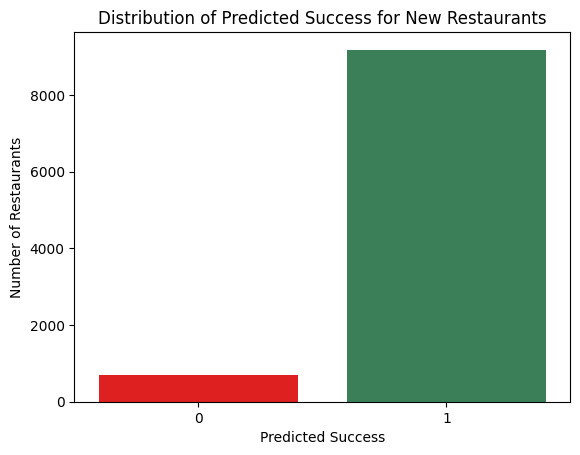

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Success Prediction', data=new_rest, palette=['red', 'seagreen'])
plt.title('Distribution of Predicted Success for New Restaurants')
plt.xlabel('Predicted Success')
plt.ylabel('Number of Restaurants')
plt.show()

## Success Probabilty

In [46]:
probabilities = model.predict_proba(final_df)

In [47]:
success_probabilities = probabilities[:, 1]

# Now you can add these probabilities to your new_rest DataFrame if you want
new_rest['Success_Probability'] = success_probabilities

# Finally, you can display the DataFrame to see the probabilities
print(new_rest[['name', 'Success_Probability']])

                                                   name  Success_Probability
0                                         Spicy Tandoor             0.561054
1                                 Om Sri Vinayaka Chats             0.736723
2                                             Chill Out             0.794294
3                                        Me And My Cake             0.644934
4                                               Sunsadm             0.791213
...                                                 ...                  ...
9937                                     Punjabi Thadka             0.645212
9938                                       Topsy Turvey             0.946258
9939                                       Topsy Turvey             0.946258
9940                           Vinod Bar And Restaurant             0.684918
9941  Plunge - Sheraton Grand Bengaluru Whitefield H...             0.980000

[9885 rows x 2 columns]


In [49]:
new_rest[['name', 'Success_Probability']]

,name,Success_Probability
0,Spicy Tandoor,0.561054
1,Om Sri Vinayaka Chats,0.736723
2,Chill Out,0.794294
3,Me And My Cake,0.644934
4,Sunsadm,0.791213
...,...,...
9937,Punjabi Thadka,0.645212
9938,Topsy Turvey,0.946258
9939,Topsy Turvey,0.946258
9940,Vinod Bar And Restaurant,0.684918


In [50]:
# Saving the updated DataFrame to a CSV file named 'New_Restaurants_Success_predicted.csv'
new_rest.to_csv('New_Restaurants_Success_predicted_with_proba.csv')

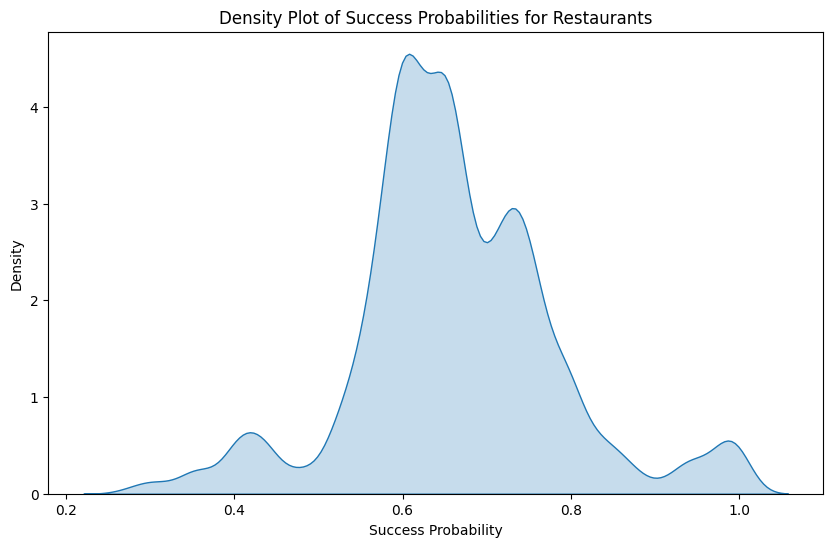

In [52]:
# looking at the distribution of success probabilty
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(new_rest['Success_Probability'], shade=True)
plt.xlabel('Success Probability')
plt.ylabel('Density')
plt.title('Density Plot of Success Probabilities for Restaurants')
plt.show()

The density plot shows a bimodal distribution of success probabilities for restaurants, indicating there are two primary groups: one more likely to succeed with higher probabilities around 0.6 and 0.8, and another less likely to succeed with lower probabilities around 0.2 and 0.4.

In [60]:
# top ten restaurants with highest success probabilty
filtered_restaurants = new_rest[new_rest['Success_Probability'] < 1]
top_ten_restaurants = filtered_restaurants.sort_values(by='Success_Probability', ascending=False).head(10)

In [62]:
top_ten_restaurants[['name','location','cost_two_person','Success Prediction', 'Success_Probability']]

,name,location,cost_two_person,Success Prediction,Success_Probability
4214,Bella,Jayanagar,1000,1,0.999333
4654,Nourich,JP Nagar,800,1,0.999333
3217,Still Sipping,HSR,800,1,0.999333
4207,Toscano,Jayanagar,1300,1,0.999333
3487,Still Sipping,HSR,800,1,0.999333
2186,Nourich,JP Nagar,800,1,0.999333
4249,24th Main,JP Nagar,800,1,0.998019
671,Fabcafe,Jayanagar,800,1,0.998019
472,Nourich,JP Nagar,800,1,0.998019
2188,Baba Chatkora,JP Nagar,1000,1,0.997143


# Conclusion

I have developed a tool that can forecast how well new restaurants might perform on the Zomato platform.  This tool doesn't just offer predictions; it provides a 'success score probability,' a numerical estimate reflecting how well a restaurant might fare based on current customer trends and preferences. This feature enables restaurateurs to assess the potential appeal of their establishment even before it launches, aligning their business strategies with market expectations and customer desires.

To keep these insights relevant and timely, I suggest implementing an automated system. This setup would regularly process incoming data from new restaurants, applying sophisticated analysis to generate updated 'success score probabilities.' These scores, indicative of the anticipated popularity and customer draw of each new restaurant, serve as a valuable guide for making informed, data-driven decisions. This proactive approach not only helps in refining business plans but also positions restaurants to thrive in Bengaluru's dynamic and competitive culinary landscape.